# 数据结构简介
本节介绍 Pandas 基础数据结构，包括各类对象的数据类型、索引、轴标记、对齐等基础操作。
“数据对齐是内在的”，这一原则是根本。除非显式指定，Pandas 不会断开标签和数据之间的连接。

In [70]:
import numpy as np
import pandas as pd

# 1.Series
Series 是带标签的一维数组，可存储整数、浮点数、字符串、Python 对象等类型的数据。轴标签统称为索引。

In [71]:
# 调用 pd.Series 函数即可创建 Series
# data 支持以下数据类型：
#   Python字典
#   多维数组
#   标量值（如，5）
# index 是轴标签列表。
data=np.random.randn(10)
index=np.random.permutation(10)
s = pd.Series(data, index=index)
s

5   -1.214084
4   -0.042727
8   -0.037699
3   -0.746387
0    1.923572
2   -0.178474
6    0.595088
1    1.797899
7    0.117727
9   -1.265344
dtype: float64

# 1.1.多维数组

data 是多维数组时，index 长度必须与 data 长度一致。没有指定 index 参数时，创建数值型索引，即 [0, ..., len(data) - 1]。
Pandas 的索引值可以重复。不支持重复索引值的操作会触发异常。其原因主要与性能有关，有很多计算实例，比如 GroupBy 操作就不用索引。

In [72]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.859338
b    0.168179
c    0.816772
d    0.592590
e    0.522715
dtype: float64

In [73]:
pd.Series(np.random.randn(5))

0   -2.066831
1    1.493939
2   -1.291507
3    0.560878
4   -0.272189
dtype: float64

# 1.2.字典

Series 可以用字典实例化

In [74]:
d = {'b': 1, 'a': 0, 'c': 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [75]:
# 如果设置了 index 参数，则按索引标签提取 data 里对应的值。Pandas 用 NaN（Not a Number）表示缺失数据。
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

# 1.3.标量值

data 是标量值时，必须提供索引。Series 按索引长度重复该标量值。

In [76]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

# 1.4.Series 类似多维数组
Series 操作与 ndarray 类似，支持大多数 NumPy 函数，还支持索引切片。

In [77]:
s[0]

-0.8593383068667865

In [78]:
s[:3]

a   -0.859338
b    0.168179
c    0.816772
dtype: float64

In [79]:
s[s > s.median()]

c    0.816772
d    0.592590
dtype: float64

In [80]:
s[[4, 3, 1]]

e    0.522715
d    0.592590
b    0.168179
dtype: float64

In [81]:
np.exp(s)

a    0.423442
b    1.183149
c    2.263182
d    1.808668
e    1.686601
dtype: float64

In [82]:
# 和 NumPy 数组一样，Series 也支持 dtype
s.dtype

dtype('float64')

# 1.5.Series 类似字典
Series 类似固定大小的字典，可以用索引标签提取值或设置值

In [83]:
s['a']

-0.8593383068667865

In [84]:
s['e']=12.
s

a    -0.859338
b     0.168179
c     0.816772
d     0.592590
e    12.000000
dtype: float64

In [85]:
'e' in s

True

In [86]:
'f' in s

False

# 1.6.矢量操作与对齐 Series 标签
Series 和 NumPy 数组一样，都不用循环每个值，而且 Series 支持大多数 NumPy 多维数组的方法。
Series 和多维数组的主要区别在于， Series 之间的操作会自动基于标签对齐数据。因此，不用顾及执行计算操作的 Series 是否有相同的标签。
编写无需显式对齐数据的代码，给交互数据分析和研究提供了巨大的自由度和灵活性。
Pandas 数据结构集成的数据对齐功能，是 Pandas 区别于大多数标签型数据处理工具的重要特性。

In [87]:
s+s

a    -1.718677
b     0.336359
c     1.633543
d     1.185181
e    24.000000
dtype: float64

In [88]:
s*2

a    -1.718677
b     0.336359
c     1.633543
d     1.185181
e    24.000000
dtype: float64

In [89]:
# 操作未对齐索引的 Series， 其计算结果是所有涉及索引的并集。如果在 Series 里找不到标签，运算结果标记为 NaN，即缺失值。
s[1:]+s[:-1]

a         NaN
b    0.336359
c    1.633543
d    1.185181
e         NaN
dtype: float64

# 1.7.名称属性
Series 支持 name 属性,一般情况下，Series 自动分配 name，特别是提取一维 DataFrame 切片时.

In [90]:
s = pd.Series(np.random.randn(5), name='something')
s

0    0.517475
1   -0.912853
2    0.215292
3    1.144455
4   -0.235868
Name: something, dtype: float64

In [91]:
s.name

'something'

In [92]:
# pandas.Series.rename() 方法用于重命名 Series 。
s2 = s.rename("different")
s2.name

'different'

# 2.DataFrame
DataFrame 是由多种类型的列构成的二维标签数据结构，类似于 Excel 、SQL 表，或 Series 对象构成的字典。DataFrame 是最常用的 Pandas 对象，与 Series 一样，DataFrame 支持多种类型的输入数据：

一维 ndarray、列表、字典、Series 字典

二维 numpy.ndarray

结构多维数组或记录多维数组

Series

DataFrame

除了数据，还可以有选择地传递 index（行标签）和 columns（列标签）参数。传递了索引或列，就可以确保生成的 DataFrame 里包含索引或列。Series 字典加上指定索引时，会丢弃与传递的索引不匹配的所有数据。

没有传递轴标签时，按常规依据输入数据进行构建。

# 2.1.用 Series 字典或字典生成 DataFrame
生成的索引是每个 Series 索引的并集。先把嵌套字典转换为 Series。如果没有指定列，DataFrame 的列就是字典键的有序列表。

In [93]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64, 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [94]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [95]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [96]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [97]:
# index 和 columns 属性分别用于访问行、列标签
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [98]:
df.columns

Index(['one', 'two'], dtype='object')

# 2.2用多维数组字典、列表字典生成 DataFrame
多维数组的长度必须相同。如果传递了索引参数，index 的长度必须与数组一致。如果没有传递索引参数，生成的结果是 range(n)，n 为数组长度。

In [99]:
d = {'one': [1., 2., 3., 4.],
     'two': [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [100]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


# 2.3.用结构多维数组或记录多维数组生成 DataFrame
本例与数组字典的操作方式相同。

In [101]:
data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data[:] = [(1, 2., 'Hello'), (2, 3., "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [102]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [103]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


# 2.4.用列表字典生成 DataFrame

In [104]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
data2

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [105]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [106]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [107]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


# 2.5.用元组字典生成 DataFrame
元组字典可以自动创建多层索引 DataFrame。

In [108]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
   ....:               ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
   ....:               ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
   ....:               ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
   ....:               ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

# 2.6.备选构建器 

1 DataFrame.from_dict

DataFrame.from_dict 接收字典组成的字典或数组序列字典，并生成 DataFrame。除了 orient 参数默认为 columns，本构建器的操作与 DataFrame 构建器类似。把 orient 参数设置为 'index'， 即可把字典的键作为行标签。

In [109]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [110]:
# orient='index' 时，键是行标签。本例还传递了列名
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                       orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


2 DataFrame.from_records

DataFrame.from_records 构建器支持元组列表或结构数据类型（dtype）的多维数组。本构建器与 DataFrame 构建器类似，只不过生成的 DataFrame 索引是结构数据类型指定的字段。

In [111]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [112]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


# 2.7.提取、添加、删除列
DataFrame 就像带索引的 Series 字典，提取、设置、删除列的操作与字典类似

In [113]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [114]:
df['three'] = df['one'] * df['two']

In [115]:
df['flag'] = df['one'] > 2

In [116]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [117]:
# 删除（del、pop）列的方式也与字典类似
del df['two']
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [118]:
three = df.pop('three')
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [119]:
# 标量值以广播的方式填充列
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [120]:
# 插入与 DataFrame 索引不同的 Series 时，以 DataFrame 的索引为准
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [121]:
# 可以插入原生多维数组，但长度必须与 DataFrame 索引长度一致。
# 默认在 DataFrame 尾部插入列。insert 函数可以指定插入列的位置
df.insert(1, 'bar', df['one'])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


# 2.8.用方法链分配新列
受 dplyr 的 mutate 启发，DataFrame 提供了 assign() 方法，可以利用现有的列创建新列。

In [122]:
from sklearn import linear_model, datasets
iris = datasets.load_iris()
iris = pd.DataFrame(iris.data,columns=iris.feature_names)
print(iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [128]:
iris.assign(sepal_ratio = iris['sepal width (cm)'] / iris['sepal length (cm)']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_ratio
0,5.1,3.5,1.4,0.2,0.686275
1,4.9,3.0,1.4,0.2,0.612245
2,4.7,3.2,1.3,0.2,0.680851
3,4.6,3.1,1.5,0.2,0.673913
4,5.0,3.6,1.4,0.2,0.720000


In [129]:
# 还可以传递带参数的函数，在 assign 的 DataFrame 上求值。
iris.assign(sepal_ratio=lambda x: (x['sepal width (cm)'] / x['sepal length (cm)'])).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_ratio
0,5.1,3.5,1.4,0.2,0.686275
1,4.9,3.0,1.4,0.2,0.612245
2,4.7,3.2,1.3,0.2,0.680851
3,4.6,3.1,1.5,0.2,0.673913
4,5.0,3.6,1.4,0.2,0.720000


In [133]:
iris.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth']
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

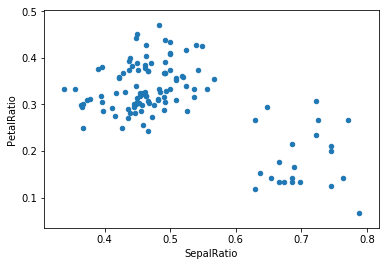

In [136]:
# 未引用 DataFrame 时，传递可调用的，不是实际要插入的值。这种方式常见于在操作链中调用 assign 的操作。
# 例如，将 DataFrame 限制为花萼长度大于 5 的观察值，计算比例，再制图
# assign 把函数传递给 DataFrame， 并执行函数运算。这是要注意的是，该 DataFrame 是筛选了花萼长度大于 5 以后的数据。
# 首先执行的是筛选操作，再计算比例。这个例子就是对没有事先筛选 DataFrame 进行的引用。
import matplotlib.pyplot as plt
(iris.query('SepalLength > 5')
      .assign(SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
              PetalRatio=lambda x: x.PetalWidth / x.PetalLength)
      .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))
plt.show()

In [137]:
# 从 3.6 版开始，Python 可以保存 **kwargs 顺序。这种操作允许依赖赋值，**kwargs 后的表达式，可以引用同一个 assign() 函数里之前创建的列 。
dfa = pd.DataFrame({"A": [1, 2, 3],"B": [4, 5, 6]})
dfa

,A,B
0,1,4
1,2,5
2,3,6


In [138]:
dfa.assign(C=lambda x: x['A'] + x['B'],D=lambda x: x['A'] + x['C'])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


# 2.9.索引 / 选择
操作	句法	结果

选择列	 df[col]	Series

用标签选择行	 df.loc[label]	Series

用整数位置选择行	df.iloc[loc]	Series

行切片	 df[5:10]	DataFrame

用布尔向量选择行	df[bool_vec]	DataFrame

In [139]:
# 选择行返回 Series，索引是 DataFrame 的列
df.loc['b']

one              2
bar              2
flag         False
foo            bar
one_trunc        2
Name: b, dtype: object

In [140]:
df.iloc[2]

one             3
bar             3
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

# 2.10.数据对齐和运算
DataFrame 对象可以自动对齐**列与索引（行标签）**的数据。与上文一样，生成的结果是列和行标签的并集。

In [143]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
print(df)
print(df2)

          A         B         C         D
0  0.724439  1.722950  0.654610 -1.068741
1 -1.553323 -0.786725  1.446206 -0.550070
2 -0.505095  0.513854  0.656501 -0.045902
3  1.371462 -0.546952 -0.769335 -0.212503
4  0.803891 -1.325703  0.681724  1.125687
5 -0.951253 -0.167480 -1.399384 -1.008397
6  1.356970 -1.389116  0.030109  1.902693
7 -0.253266 -0.818391 -0.493279  2.131640
8 -0.144306  1.072312 -0.058643  0.050146
9  0.120614 -0.267703  0.391667  0.254860
          A         B         C
0 -2.170269  0.229893  0.244918
1  0.079693  0.158566 -0.876018
2 -1.079865 -0.369503 -0.477979
3 -0.477843 -1.548151 -1.597028
4 -1.611474  0.763256  0.224128
5  0.464099  0.030963 -0.969406
6  0.359649  1.679868 -0.643590


In [142]:
df + df2

,A,B,C,D
0,-0.424512,0.971388,-1.241444,NaN
1,0.389776,-1.361248,0.447082,NaN
2,0.841661,1.598824,-0.135509,NaN
3,-2.098401,-1.207118,-1.051361,NaN
4,0.778200,1.070403,-0.006874,NaN
5,1.659118,0.927018,1.269431,NaN
6,-1.187404,3.252900,0.029902,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [146]:
# DataFrame 和 Series 之间执行操作时，默认操作是在 DataFrame 的列上对齐 Series 的索引，按行执行广播操作。
print(df)
print('------------------------')
print(df.iloc[0])

          A         B         C         D
0  0.724439  1.722950  0.654610 -1.068741
1 -1.553323 -0.786725  1.446206 -0.550070
2 -0.505095  0.513854  0.656501 -0.045902
3  1.371462 -0.546952 -0.769335 -0.212503
4  0.803891 -1.325703  0.681724  1.125687
5 -0.951253 -0.167480 -1.399384 -1.008397
6  1.356970 -1.389116  0.030109  1.902693
7 -0.253266 -0.818391 -0.493279  2.131640
8 -0.144306  1.072312 -0.058643  0.050146
9  0.120614 -0.267703  0.391667  0.254860
------------------------
A    0.724439
B    1.722950
C    0.654610
D   -1.068741
Name: 0, dtype: float64


In [147]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-2.277762,-2.509676,0.791596,0.518671
2,-1.229534,-1.209097,0.001890,1.022839
3,0.647022,-2.269902,-1.423946,0.856237
4,0.079452,-3.048653,0.027114,2.194428
5,-1.675692,-1.890430,-2.053994,0.060343
6,0.632530,-3.112066,-0.624501,2.971434
7,-0.977705,-2.541342,-1.147889,3.200381
8,-0.868745,-0.650638,-0.713253,1.118887
9,-0.603826,-1.990653,-0.262943,1.323601


In [149]:
# 时间序列是特例，DataFrame 索引包含日期时，按列广播
index = pd.date_range('1/1/2019', periods=8)
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08'],
              dtype='datetime64[ns]', freq='D')

In [150]:
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))
df

,A,B,C
2019-01-01,-0.161836,-1.189045,-3.573944
2019-01-02,0.422007,-0.527002,-0.463877
2019-01-03,-0.327112,-0.993318,0.804157
2019-01-04,0.323131,1.067051,0.536235
2019-01-05,-0.784915,-1.347889,-1.275939
2019-01-06,-0.176601,1.421249,-0.423495
2019-01-07,-1.889084,2.068997,1.236117
2019-01-08,-1.246437,-0.397164,1.128063


In [151]:
type(df['A'])

pandas.core.series.Series

In [153]:
df.sub(df['A'], axis=0)

,A,B,C
2019-01-01,0.0,-1.027208,-3.412108
2019-01-02,0.0,-0.949008,-0.885883
2019-01-03,0.0,-0.666205,1.131269
2019-01-04,0.0,0.743920,0.213104
2019-01-05,0.0,-0.562974,-0.491024
2019-01-06,0.0,1.597850,-0.246894
2019-01-07,0.0,3.958081,3.125202
2019-01-08,0.0,0.849273,2.374500


In [154]:
# 标量操作与其它数据结构一样
df * 5 + 2

,A,B,C
2019-01-01,1.190818,-3.945224,-15.869722
2019-01-02,4.110033,-0.635009,-0.319384
2019-01-03,0.364439,-2.966588,6.020783
2019-01-04,3.615653,7.335254,4.681173
2019-01-05,-1.924574,-4.739446,-4.379696
2019-01-06,1.116995,9.106247,-0.117475
2019-01-07,-7.445422,12.344985,8.180586
2019-01-08,-4.232186,0.014178,7.640314


In [155]:
1 / df

,A,B,C
2019-01-01,-6.179081,-0.841011,-0.279803
2019-01-02,2.369631,-1.897527,-2.155745
2019-01-03,-3.057055,-1.006727,1.243539
2019-01-04,3.094724,0.937163,1.864856
2019-01-05,-1.274024,-0.741901,-0.783736
2019-01-06,-5.662483,0.703606,-2.361303
2019-01-07,-0.529357,0.483326,0.808985
2019-01-08,-0.802287,-2.517850,0.886476


In [156]:
df ** 4

,A,B,C
2019-01-01,0.000686,1.998908,163.151543
2019-01-02,0.031716,0.077134,0.046303
2019-01-03,0.011450,0.973537,0.418179
2019-01-04,0.010902,1.296404,0.082684
2019-01-05,0.379568,3.300782,2.650452
2019-01-06,0.000973,4.080197,0.032166
2019-01-07,12.735193,18.324806,2.334741
2019-01-08,2.413691,0.024882,1.619321


In [157]:
# 支持布尔运算符
df1 = pd.DataFrame({'a': [1, 0, 1], 'b': [0, 1, 1]}, dtype=bool)
df1

,a,b
0,True,False
1,False,True
2,True,True


In [158]:
df2 = pd.DataFrame({'a': [0, 1, 1], 'b': [1, 1, 0]}, dtype=bool)
df2

,a,b
0,False,True
1,True,True
2,True,False


In [159]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [160]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [161]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [162]:
- df1

,a,b
0,False,True
1,True,False
2,False,False


# 2.11.转置
类似于多维数组，T 属性（即 transpose 函数）可以转置 DataFrame

In [163]:
df[:5]

,A,B,C
2019-01-01,-0.161836,-1.189045,-3.573944
2019-01-02,0.422007,-0.527002,-0.463877
2019-01-03,-0.327112,-0.993318,0.804157
2019-01-04,0.323131,1.067051,0.536235
2019-01-05,-0.784915,-1.347889,-1.275939


In [164]:
df[:5].T

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00
A,-0.161836,0.422007,-0.327112,0.323131,-0.784915
B,-1.189045,-0.527002,-0.993318,1.067051,-1.347889
C,-3.573944,-0.463877,0.804157,0.536235,-1.275939


# 2.12.DataFrame 应用 NumPy 函数
Series 与 DataFrame 可使用 log、exp、sqrt 等多种元素级 NumPy 通用函数（ufunc） ，DataFrame 不是多维数组的替代品，它的索引语义和数据模型与多维数组都不同。

In [165]:
# 假设 DataFrame 的数据都是数字
np.exp(df)

,A,B,C
2019-01-01,0.850580,0.304512,0.028045
2019-01-02,1.525019,0.590372,0.628841
2019-01-03,0.721003,0.370346,2.234811
2019-01-04,1.381446,2.906794,1.709557
2019-01-05,0.456159,0.259788,0.279169
2019-01-06,0.838114,4.142292,0.654754
2019-01-07,0.151210,7.916878,3.442222
2019-01-08,0.287527,0.672224,3.089665


In [166]:
np.asarray(df)

array([[-0.16183637, -1.18904482, -3.57394444],
       [ 0.42200656, -0.52700171, -0.46387679],
       [-0.3271122 , -0.99331751,  0.80415657],
       [ 0.32313064,  1.06705078,  0.53623456],
       [-0.78491475, -1.34788925, -1.27593924],
       [-0.17660096,  1.42124932, -0.42349507],
       [-1.8890845 ,  2.06899692,  1.23611725],
       [-1.24643726, -0.39716432,  1.12806273]])

In [167]:
# Series 应用 __array_ufunc__，支持 NumPy 通用函数。
# 通用函数应用于 Series 的底层数组。
ser = pd.Series([1, 2, 3, 4])
ser

0    1
1    2
2    3
3    4
dtype: int64

In [168]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [169]:
# Pandas 可以自动对齐 ufunc 里的多个带标签输入数据。例如，两个标签排序不同的 Series 运算前，会先对齐标签。
ser1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
ser1

a    1
b    2
c    3
dtype: int64

In [170]:
ser2 = pd.Series([1, 3, 5], index=['b', 'a', 'c'])
ser2

b    1
a    3
c    5
dtype: int64

In [171]:
np.remainder(ser1, ser2)

a    0
b    2
c    3
dtype: int64

In [172]:
# 一般来说，Pandas 提取两个索引的并集，不重叠的值用缺失值填充。
ser3 = pd.Series([2, 4, 6], index=['b', 'c', 'd'])
ser3

b    2
c    4
d    6
dtype: int64

In [173]:
np.remainder(ser1, ser3)

a    1
b    2
c    3
dtype: int64

In [174]:
# 对 Series 和 Index 应用二进制 ufunc 时，优先执行 Series，并返回的结果也是 Series 。
ser = pd.Series([1, 2, 3])
ser

0    1
1    2
2    3
dtype: int64

In [175]:
idx = pd.Index([4, 5, 6])
idx

Int64Index([4, 5, 6], dtype='int64')

In [176]:
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

# 2.13.控制台显示
控制台显示大型 DataFrame 时，会根据空间调整显示大小。info()函数可以查看 DataFrame 的信息摘要。

In [177]:
print(df)

                   A         B         C
2019-01-01 -0.161836 -1.189045 -3.573944
2019-01-02  0.422007 -0.527002 -0.463877
2019-01-03 -0.327112 -0.993318  0.804157
2019-01-04  0.323131  1.067051  0.536235
2019-01-05 -0.784915 -1.347889 -1.275939
2019-01-06 -0.176601  1.421249 -0.423495
2019-01-07 -1.889084  2.068997  1.236117
2019-01-08 -1.246437 -0.397164  1.128063


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2019-01-01 to 2019-01-08
Freq: D
Data columns (total 3 columns):
A    8 non-null float64
B    8 non-null float64
C    8 non-null float64
dtypes: float64(3)
memory usage: 512.0 bytes


In [179]:
# 尽管 to_string 有时不匹配控制台的宽度，但还是可以用 to_string 以表格形式返回 DataFrame 的字符串表示形式
print(df.to_string())

                   A         B         C
2019-01-01 -0.161836 -1.189045 -3.573944
2019-01-02  0.422007 -0.527002 -0.463877
2019-01-03 -0.327112 -0.993318  0.804157
2019-01-04  0.323131  1.067051  0.536235
2019-01-05 -0.784915 -1.347889 -1.275939
2019-01-06 -0.176601  1.421249 -0.423495
2019-01-07 -1.889084  2.068997  1.236117
2019-01-08 -1.246437 -0.397164  1.128063


In [180]:
# 默认情况下，过宽的 DataFrame 会跨多行输出
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.918646,0.179521,-0.422941,0.315468,-0.580975,0.176260,-0.816041,0.920390,1.575061,-1.408701,-0.468732,1.320329
1,-0.666157,0.511259,-0.121207,-1.057603,0.717443,0.109117,2.302391,-1.061880,0.075858,-0.140427,0.394468,-0.563413
2,0.271297,1.102504,-0.373961,-0.488414,-2.554342,-0.567066,-0.046217,1.029398,-0.664960,0.588704,1.187782,3.401646


In [181]:
# display.width 选项可以更改单行输出的宽度
pd.set_option('display.width', 40)  # 默认值为 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.452925,1.095094,-0.567499,2.212516,-1.873595,0.072095,0.395975,1.120698,-0.512730,0.802019,-0.264308,1.292002
1,1.054753,-0.681942,-1.285934,0.242988,0.400527,-0.697464,-0.597698,-0.455115,0.152318,1.204854,-0.721541,-0.881001
2,0.259197,0.758748,0.827731,0.061644,0.860486,0.142911,-0.337251,-0.295660,-0.341016,0.283275,-0.919971,-0.276910


In [183]:
# 还可以用 display.max_colwidth 调整最大列宽。
datafile = {'filename': ['filename_01', 'filename_02'],
            'path': ["media/user_name/storage/folder_01/filename_01",
                     "media/user_name/storage/folder_02/filename_02"]}
pd.set_option('display.max_colwidth', 30)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [184]:
pd.set_option('display.max_colwidth', 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


# 2.14.DataFrame 列属性访问和 IPython 代码补全
DataFrame 列标签是有效的 Python 变量名时，可以像属性一样访问该列

In [185]:
df = pd.DataFrame({'foo1': np.random.randn(5),'foo2': np.random.randn(5)})
df

,foo1,foo2
0,-0.487721,-0.641620
1,-1.405117,-0.429542
2,0.649513,0.258773
3,0.682900,1.324611
4,-0.624829,-1.074982


In [186]:
df.foo1

0   -0.487721
1   -1.405117
2    0.649513
3    0.682900
4   -0.624829
Name: foo1, dtype: float64

In [187]:
# IPython 支持补全功能，按 tab 键可以实现代码补全
df.foo2

0   -0.641620
1   -0.429542
2    0.258773
3    1.324611
4   -1.074982
Name: foo2, dtype: float64